In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
X = pd.read_csv("Train.csv", usecols = ['feature_1','feature_2','feature_3','feature_4','feature_5'])
Y = pd.read_csv("Train.csv",usecols = ['target'])


In [3]:
X.head()


,feature_1,feature_2,feature_3,feature_4,feature_5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997
2,0.236425,0.132836,-0.147723,0.699854,-0.187364
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077


In [4]:
Y=Y.values

X=X.values

In [17]:
Y.shape
#Y
#plt.scatter(X[:,3],X[:,2],c=Y)

(1600, 1)

In [6]:
#ones=np.ones((1600,1))

#X=np.hstack([ones,X])
print(X.shape)
#
print(data.head())

(1600, 5)


In [7]:
def hypothesis(X,theta):
    p=0
    for i in range(X.shape[0]):
        p += theta[i]*X[i]
    return p

In [8]:
def error(X,Y,theta):
    m=X.shape[0]
    err=0
    #for i in range(X.shape[1]):
    for j in range(m):
        hypo=hypothesis(X[j],theta)
        err+=(Y[j]-hypo)**2
    return err

In [9]:
def gradient(X,Y,theta):
    m=X.shape[0]
    n=X.shape[1]
    grad=np.zeros((n,))
    
    for j in range(n):
        for i in range(m):
            hx = hypothesis(X[i],theta)
            grad[j] += ( hx - Y[i][0])*X[i][j]
            
    return grad
    
    

In [10]:
def GradientDescent(X,Y,learning_rate=0.0001):
    #m=X.shape[0]
    
    theta=np.zeros((X.shape[1],))
    
    errorlist=[]
    itr=0
    max_itr=1000
    
    while(itr<=max_itr):
        err=error(X,Y,theta)
        errorlist.append(err)
        grad=gradient(X,Y,theta)
        for j in range(X.shape[1]):
            
            theta[j]=theta[j]-learning_rate*grad[j]
            
            
        itr+=1
            
    return theta,errorlist

In [11]:
final_theta,errorlist=GradientDescent(X,Y)

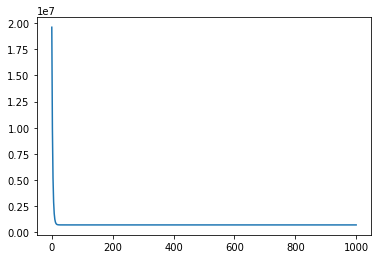

In [12]:
plt.plot(errorlist)

In [13]:
xtest=pd.read_csv('Test.csv')
print(xtest.head())
#print(xtest.shape)
xtest=xtest.values
print(xtest.shape)

   feature_1  feature_2  feature_3  feature_4  feature_5
0   1.015254   2.076209  -0.266435  -2.418088  -0.980503
1  -0.375021   0.953185   0.626719   0.704406  -0.355489
2  -1.024452   0.962991  -0.407942  -1.861274   0.455201
3  -2.489841   0.544802   0.601219  -0.607021  -1.314286
4  -0.384675  -0.833624   1.358552  -0.547932   0.411925
(400, 5)


In [14]:
ypred=[]
n=xtest.shape[0]
for i in range(n):
    lx=hypothesis(xtest[i],final_theta)
    ypred.append(lx)

In [15]:
serial=[i for i in range(400)]
submit=pd.DataFrame({'Id':serial,'target':ypred})
submit.to_csv('ypred.csv',index=False)

In [16]:
submit.head()

,Id,target
0,0,109.813169
1,1,112.582154
2,2,-26.389129
3,3,-49.102941
4,4,-100.960607
